In [14]:
import matplotlib.cm; matplotlib.cm.datad.keys()

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'])

--- Verificação do Teorema do Valor Médio ---
Lado Esquerdo: f(B) - f(A) = 0.807361
Lado Direito: ∇f(C) ⋅ (B - A) = 0.807361
---------------------------------------------


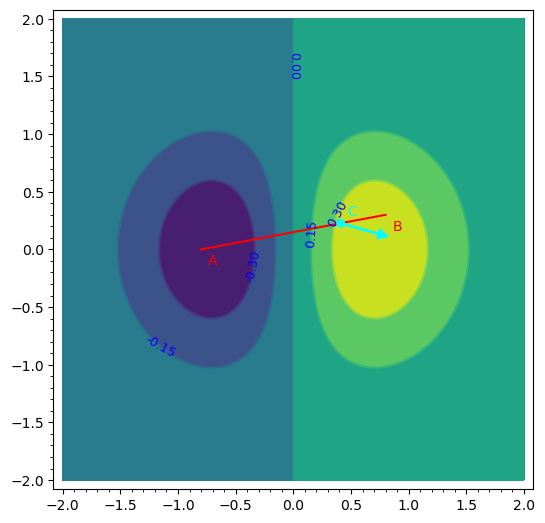

Graphics3d Object

In [20]:
import matplotlib.cm as cm

var('x y t')

i = 2

f(x, y) = x * exp(-x^2 - y^2)

a = vector([-0.8, 0])
b = vector([0.8, 0.3])

df = f(b[0], b[1]) - f(a[0], a[1])

gf = f.gradient()

AB = b - a

C = a + t*AB

rhs(t) = gf.subs(x=C[0], y=C[1]).dot_product(AB)

try:
    t_c = find_root(rhs(t) - df, 0, 1)
    C = C.subs(t=t_c)
    grad_C = gf.subs(x=C[0], y=C[1])
    encontrou_C = True
except RuntimeError:
    print('Não foi possível encontrar um ponto C numericamente no intervalo.')
    encontrou_C = False


plot_fundo = density_plot(f, (x, -2, 2), (y, -2, 2), cmap=cm.viridis)
plot_contorno = contour_plot(f, (x, -2, 2), (y, -2, 2), cmap=cm.viridis, labels=True)

plot_pontos = point(a, color='red', size=30) + text("A", a + vector([0.1, -0.1]), color='red')
plot_pontos += point(b, color='red', size=30) + text("B", b + vector([0.1, -0.1]), color='red')
plot_segmento = line([a, b], color='red', thickness=1.5)

plot_resultado = plot_fundo + plot_contorno + plot_pontos + plot_segmento

if encontrou_C:
    plot_ponto_C = point(C, color='cyan', size=40, zorder=10)
    plot_ponto_C += text("C", C + vector([0.1, 0.1]), color='cyan')
    
    plot_gradiente = arrow(C, C + grad_C*0.8, color='cyan', width=2, arrowsize=3)
    
    plot_resultado += plot_ponto_C + plot_gradiente
    
    print("--- Verificação do Teorema do Valor Médio ---")
    print(f"Lado Esquerdo: f(B) - f(A) = {df.n(digits=6)}")
    print(f"Lado Direito: ∇f(C) ⋅ (B - A) = {rhs(t_c).n(digits=6)}")
    print("---------------------------------------------")

plot_resultado.show(figsize = 8)

plot_superficie = plot3d(f, (x, -2, 2), (y, -2, 2), cmap='viridis', opacity=0.8)

if encontrou_C:

    A_3d = vector([a[0], a[1], f(a[0], a[1])])
    B_3d = vector([b[0], b[1], f(b[0], b[1])])
    C_3d = vector([C[0], C[1], f(C[0], C[1])])


    pontos_3d = point3d(A_3d, color='red', size=20) + point3d(B_3d, color='red', size=20)
    ponto_C_3d = point3d(C_3d, color='cyan', size=25)

    linha_secante_3d = line3d([A_3d, B_3d], color='red', thickness=4)

    vetor_gradiente_3d = arrow3d(C_3d, C_3d + vector([grad_C[0], grad_C[1], 0]), color='cyan', radius=0.02)

    plot_resultado_3d = plot_superficie + pontos_3d + ponto_C_3d + linha_secante_3d + vetor_gradiente_3d

    plot_resultado_3d.show(aspect_ratio=[1, 1, 0.5], title="Visualização 3D do Teorema do Valor Médio")